In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [ ]:
data_path = '/content/drive/MyDrive/Movies Recommendation/Dataset/ml-32m/final_dataset.csv'
df = pd.read_csv(data_path)

In [ ]:
print("Tổng quan dữ liệu:")
print(df.info())
print("\nThống kê mô tả:")
print(df.describe())

Tổng quan dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259450 entries, 0 to 259449
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   userId         259450 non-null  int64  
 1   movieId        259450 non-null  int64  
 2   rating         259450 non-null  float64
 3   title          259447 non-null  object 
 4   genres         259450 non-null  object 
 5   tag            259450 non-null  object 
 6   year           259450 non-null  int64  
 7   movielens_url  259450 non-null  object 
 8   imdb_url       259450 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 17.8+ MB
None

Thống kê mô tả:
              userId        movieId         rating           year
count  259450.000000  259450.000000  259450.000000  259450.000000
mean    81091.533956   63957.886745       3.703301    2000.269142
std     46980.691207   71682.093754       1.062119      17.340375
min        22.000000       

In [ ]:
print("\nSố lượng bản ghi:")
print(f"Tổng số bản ghi: {len(df)}")
print(f"Số lượng phim duy nhất: {df['movieId'].nunique()}")
print(f"Số lượng người dùng duy nhất: {df['userId'].nunique()}")


Số lượng bản ghi:
Tổng số bản ghi: 259450
Số lượng phim duy nhất: 26849
Số lượng người dùng duy nhất: 14494


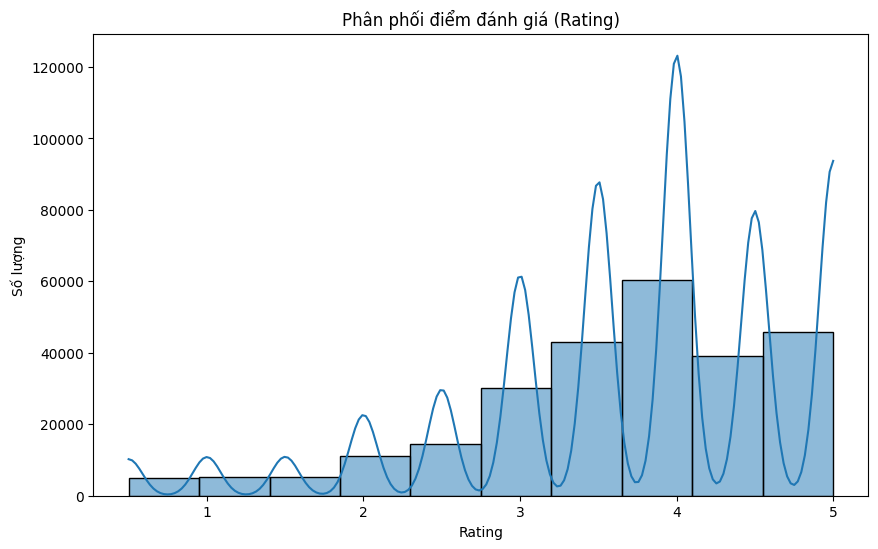

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Phân phối điểm đánh giá (Rating)')
plt.xlabel('Rating')
plt.ylabel('Số lượng')
plt.show()

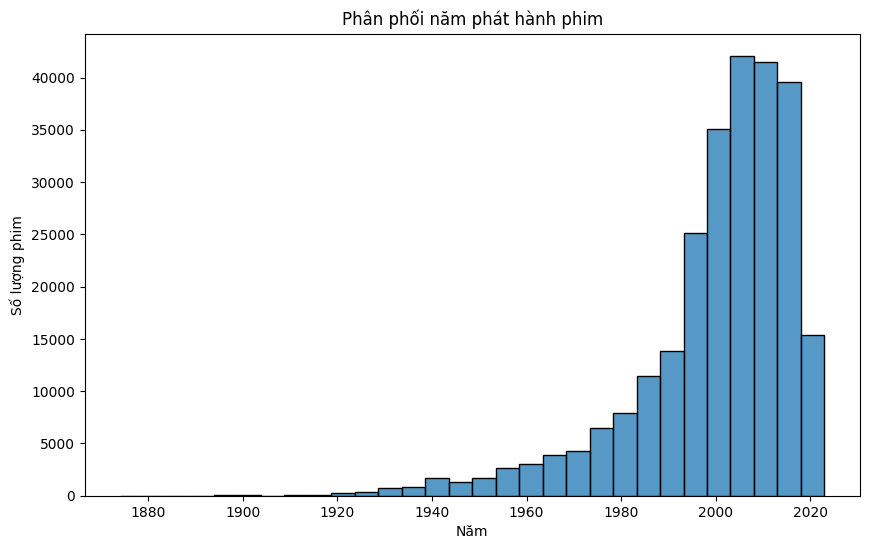

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=30, kde=False)
plt.title('Phân phối năm phát hành phim')
plt.xlabel('Năm')
plt.ylabel('Số lượng phim')
plt.show()

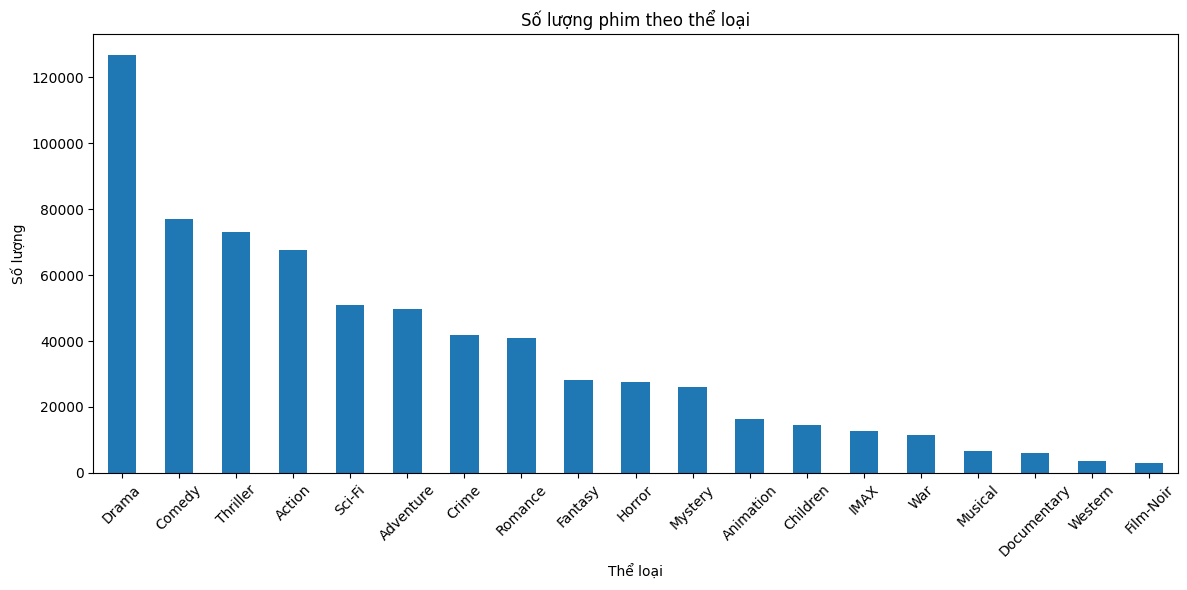

In [ ]:
genres = df['genres'].str.split('|').explode().value_counts()
plt.figure(figsize=(12, 6))
genres.plot(kind='bar')
plt.title('Số lượng phim theo thể loại')
plt.xlabel('Thể loại')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

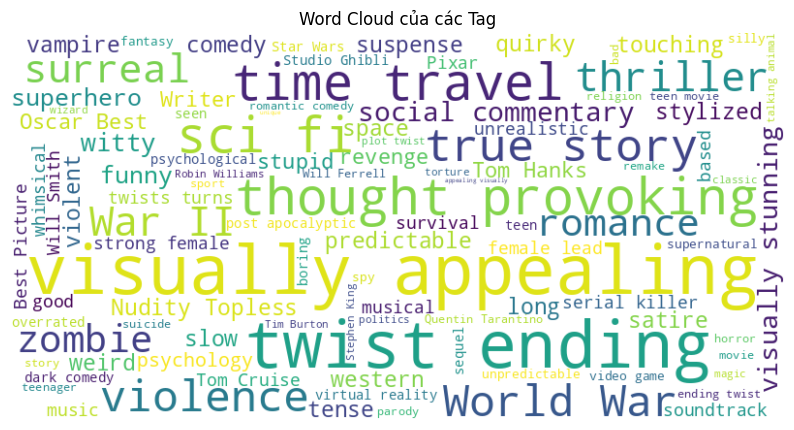

In [ ]:
tags_text = ' '.join(df['tag'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(tags_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud của các Tag')
plt.show()

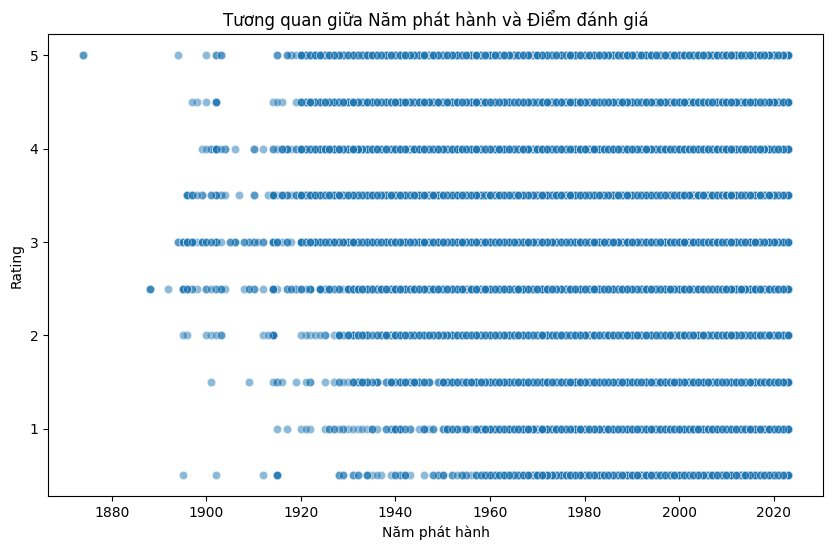

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='rating', data=df, alpha=0.5)
plt.title('Tương quan giữa Năm phát hành và Điểm đánh giá')
plt.xlabel('Năm phát hành')
plt.ylabel('Rating')
plt.show()

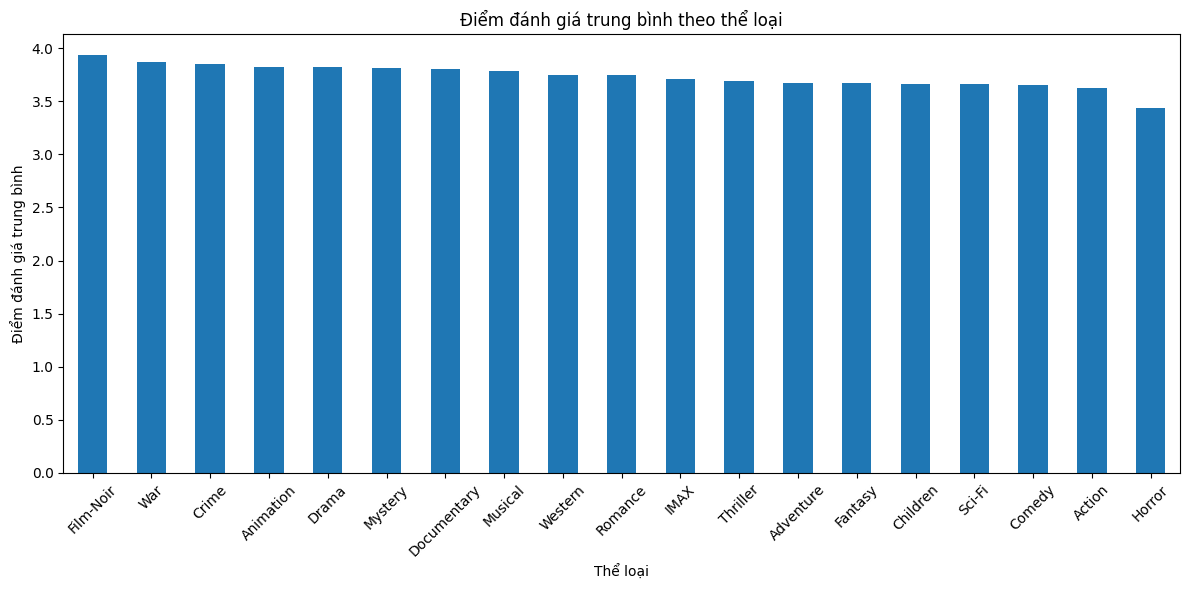

In [ ]:
genres_rating = df.copy()
genres_rating['genres'] = genres_rating['genres'].str.split('|')
genres_rating = genres_rating.explode('genres')
avg_rating_by_genre = genres_rating.groupby('genres')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_rating_by_genre.plot(kind='bar')
plt.title('Điểm đánh giá trung bình theo thể loại')
plt.xlabel('Thể loại')
plt.ylabel('Điểm đánh giá trung bình')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

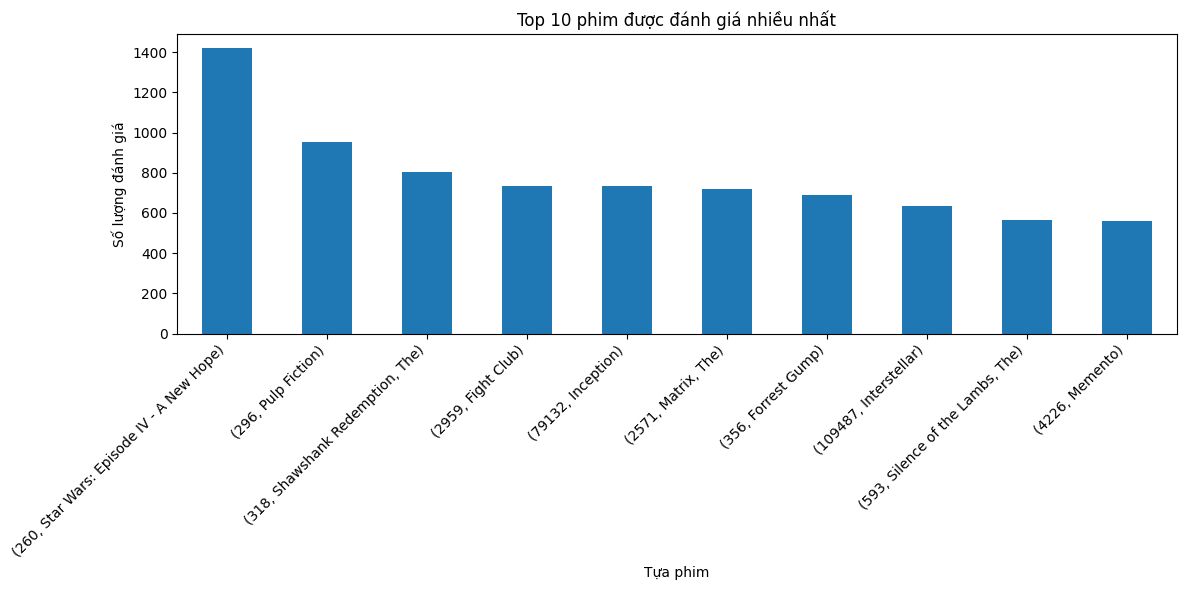

In [ ]:
top_movies = df.groupby(['movieId', 'title'])['rating'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_movies.plot(kind='bar')
plt.title('Top 10 phim được đánh giá nhiều nhất')
plt.xlabel('Tựa phim')
plt.ylabel('Số lượng đánh giá')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

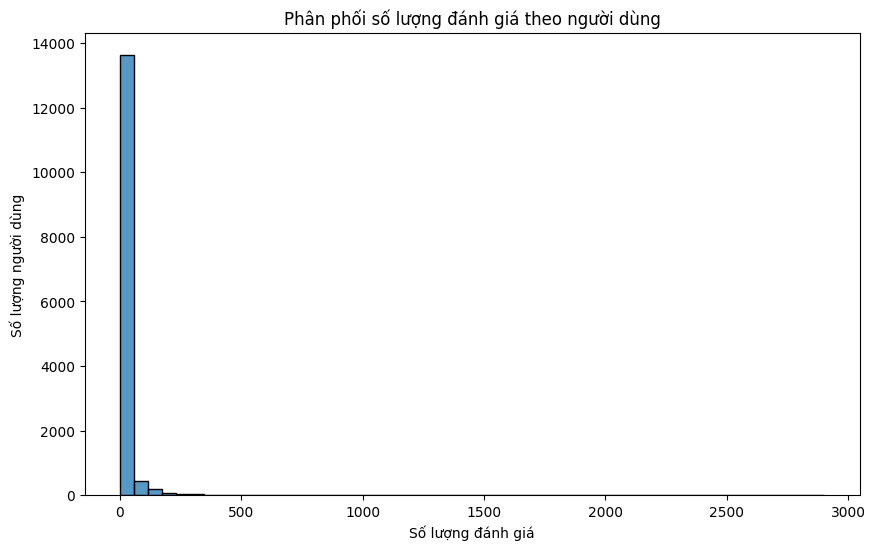

In [ ]:
ratings_per_user = df.groupby('userId')['rating'].count()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=50, kde=False)
plt.title('Phân phối số lượng đánh giá theo người dùng')
plt.xlabel('Số lượng đánh giá')
plt.ylabel('Số lượng người dùng')
plt.show()